In [1]:
from MarketMaker.market_maker.run_game import MarketMakerGame
import argparse    
import numpy as np

In [2]:
import sys; sys.argv=['']; del sys
parser = argparse.ArgumentParser(
    description='Arguments for the BeeWorld game'
)

# Agent arguments
parser.add_argument('--random_state', default=2022, help='The random state'
                    ' value')
parser.add_argument('--n_trials', type=int, default=100, help='The number '
                    'of simulated steps to evaluate')
parser.add_argument('--initial_inventory', type=float, default=0, 
                    help='The initial amount of inventory held by the agent')

# Game arguments
parser.add_argument('--agent', type=str, default='MarketAgent', help='The '
                    'name of the agent')
parser.add_argument('--function',type=str, default='ESN', help=' name of '
                    'the value function approximator')
parser.add_argument('--n', type=int, default=10000, help='The number of '
                    'time steps in the game')
parser.add_argument('--alpha', type=float, default=1, help='The cost of '
                    'operating the control')
parser.add_argument('--beta', type=float, default=1, help='The cost of '
                    'straying from the origin')
parser.add_argument('--eps', type=float, default=1, help='Timestep')
parser.add_argument('--sigma', type=float, default=1, help='The volatility'
                    ' parameter')
parser.add_argument('--loc', type=float, default=0, help='The mean '
                    'parameter of the normal distribution')
parser.add_argument('--r', type=float, default=0, help='The baseline '
                    'profit parameter')
parser.add_argument('--eta', type=float, default=0.05, help='The constant'
                    ' representing the rate of exponential drift toward 0')

# function approximator arguments
parser.add_argument('--n_inputs', default=2, help='The dimensionality of '
                    'the input')
parser.add_argument('--n_outputs', default=1, help='The dimensionality of '
                   'the output')
parser.add_argument('--n_reservoir', default=300, help='The size of the '
                    'reservoir')
parser.add_argument('--activation', default='ReLU', help='The activation '
                    'function')
parser.add_argument('--two_norm', type=float, default=1, help='The 2-norm '
                    'of the recurrent weight matrix')
parser.add_argument('--sparsity', type=float, default=0.0, 
                    help='The proportion of recurrent weights set to zero')
# Here we use a higher L2 penalty then in the original paper (10^-2 instead of 10^-6)
parser.add_argument('--L2', type=float, default=10**-2, 
                    help='The regularisation parameter of the ridge '
                    'regression')
parser.add_argument('--gamma', type=float, default=np.exp(-1), help='The discount'
                    ' factor of the value function')
parser.add_argument('--sampling_bounds', type=float, default=0.05, 
                    help='The uniform bounds of the interval from which to'
                    ' sample the random matrices') 

config = parser.parse_args()

In [3]:
# initialising the game
MMGame = MarketMakerGame(config)

In [4]:
# run the game with the initial policy pi_0
MMGame.run_game(mode='init')

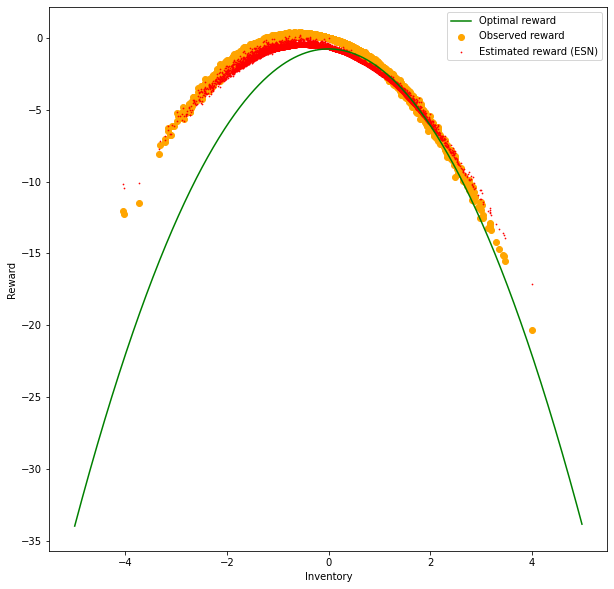

In [5]:
# plot true and estimated reward vs inventory and the optimal curve for the policy p0
MMGame.plot_inventory_reward(plot_solution=True)

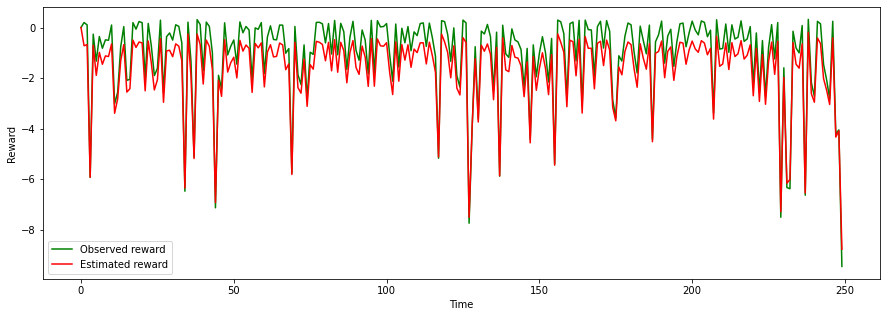

In [6]:
# plot estimated and observed levels of reward over time for the policy p0
MMGame.plot_rewards()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


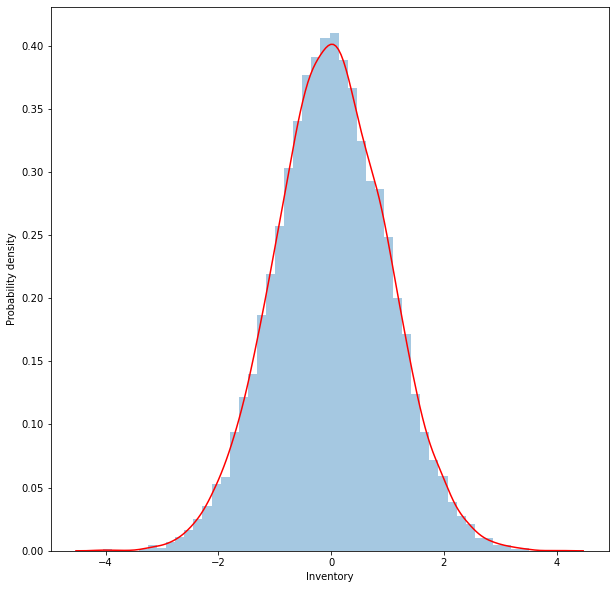

In [7]:
# plot the the invariant measure of the inventory process 
# under the policy p0 approximated with a histogram
MMGame.plot_inventory_distribution()

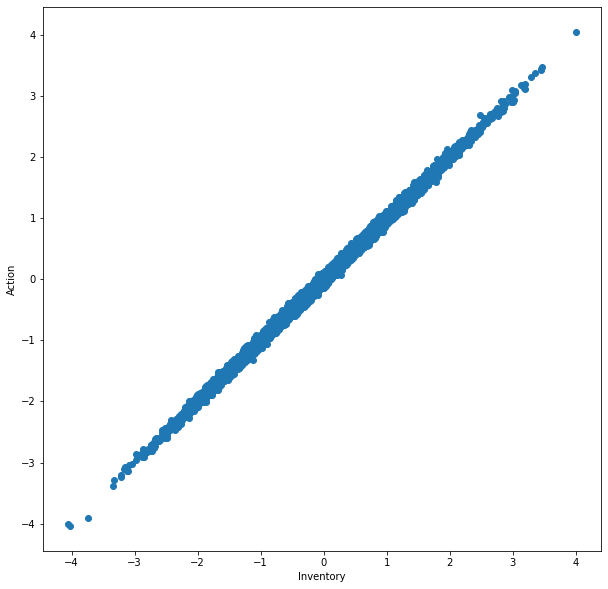

In [8]:
# Plot the (inventory, action) pairs under the policy p0
MMGame.plot_inventory_action()

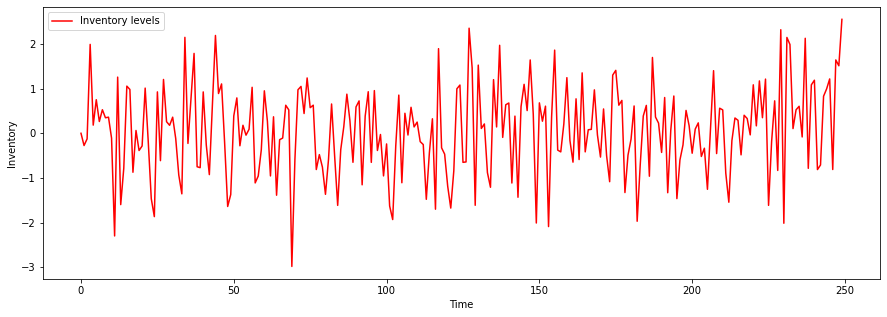

In [9]:
# plot the change of inventory levels over time for the policy p0
MMGame.plot_game()

In [10]:
print(f'Average inventory levels of the Market Maker \n'
      f'under the strategy pi_0: {MMGame.z[:,0].mean()}')

Average inventory levels of the Market Maker 
under the strategy pi_0: 0.0018785707756495298


In [11]:
# estimate the imporoved policy pi_1 and run the game
MMGame.run_game(mode='train')

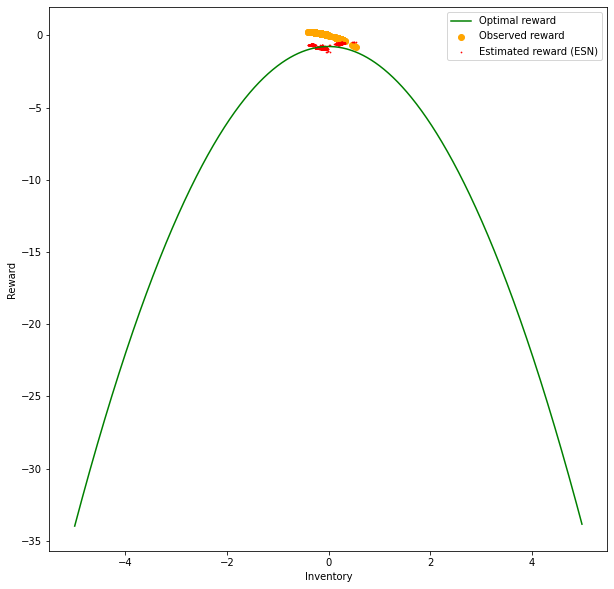

In [12]:
# plot true and estimated reward vs inventory and the optimal curve for the policy p1
MMGame.plot_inventory_reward(plot_solution=True)

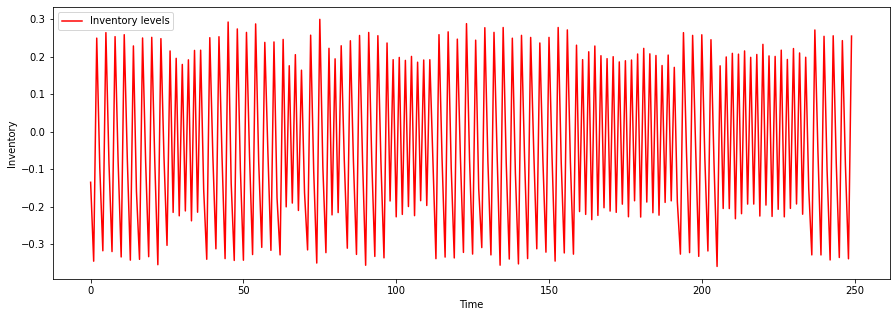

In [13]:
# plot true and estimated reward vs inventory and the optimal curve for the policy p0
MMGame.plot_game()
# The ESN produced dstrategy exhibits a higher control over 
# the levels of inventory, staying closer to zero

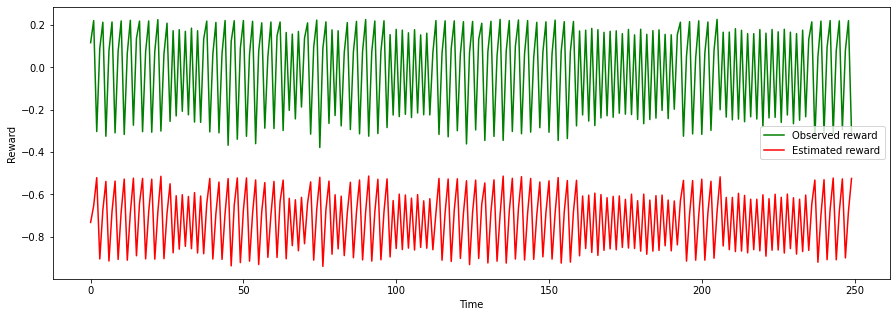

In [14]:
# plot estimated and observed levels of reward over time
MMGame.plot_rewards()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


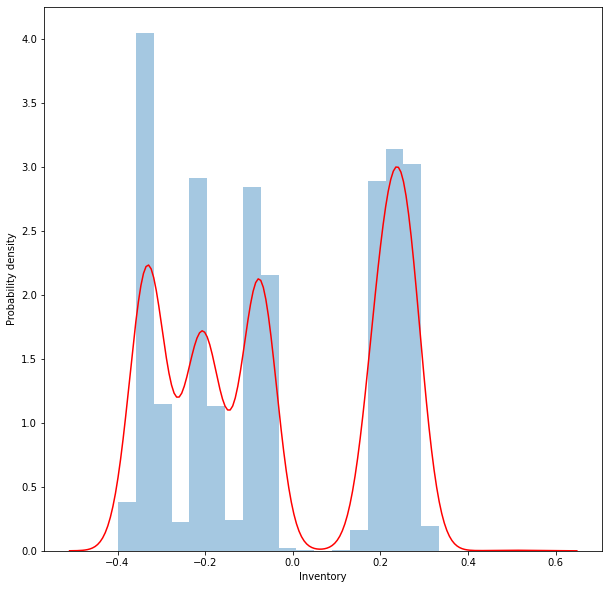

In [15]:
#  plot the the invariant measure of the inventory process 
# under the policy p1 approximated with a histogram
MMGame.plot_inventory_distribution()

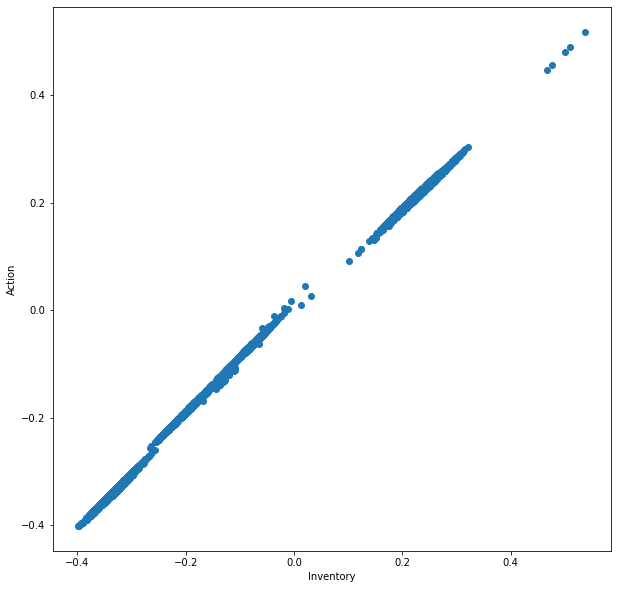

In [16]:
# Plot the (inventory, action) pairs under the policy p1
MMGame.plot_inventory_action()

In [17]:
print(f'Average inventory levels of the Market Maker \n'
      f'under the improved strategy pi_1: {MMGame.z[:,0].mean()}')

Average inventory levels of the Market Maker 
under the improved strategy pi_1: -0.03795062607921877


---